Math
$$K=\begin{bmatrix}-k_{1} & k_{2} \\k_{1} & -k_{2} \end{bmatrix}$$

$$B=\begin{bmatrix}-\frac{1}{T_A}+i(w_{A}-w) & 0 \\0 & -\frac{1}{T_B}+i(w_{B}-w) \end{bmatrix}$$

$$P=\begin{bmatrix}i*p_{A}  \\i*p_{B} \end{bmatrix}$$

$$M=\begin{bmatrix}M_{A}  \\M_{B} \end{bmatrix}$$

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables for k1, k2, T_A, T_B, w_A, w_B, w, p_A, p_B, M_A, M_B
k1, k2 = sp.symbols('k1 k2')
T_A, T_B = sp.symbols('T_A T_B')
w_A, w_B, w = sp.symbols('w_A w_B w')
p_A = k2 / (k1 + k2)
p_B = k1 / (k1 + k2)

# Define the symbolic variables for M_A and M_B
M_A, M_B = sp.symbols('M_A M_B')

# Define the matrix K
K = sp.Matrix([
    [-k1, k2],
    [k1, -k2]
])

# Define the matrix B (updated according to your instructions)
B = sp.Matrix([
    [-1/T_A + sp.I * (w_A - w), 0],
    [0, -1/T_B + sp.I * (w_B - w)]
])

# Define the vector W
W = sp.Matrix([
    [sp.I * p_A],
    [sp.I * p_B]
])

# Define the vector M
M = sp.Matrix([
    [M_A],
    [M_B]
])

# Define the equation (B + K) * M + W = 0
equation = (B + K) * M + W

# Solve the equation for M_A and M_B
solution = sp.solve(equation, [M_A, M_B])

# Define M(w) = M_A + M_B
M_w = solution[M_A] + solution[M_B]

M_w

(-I*T_A*T_B*k1**2 - I*T_A*T_B*k1*k2 + T_A*T_B*k1*w - T_A*T_B*k1*w_A - I*T_B*k1)/(-I*T_A*T_B*k1**2*w + I*T_A*T_B*k1**2*w_B - 2*I*T_A*T_B*k1*k2*w + I*T_A*T_B*k1*k2*w_A + I*T_A*T_B*k1*k2*w_B + T_A*T_B*k1*w**2 - T_A*T_B*k1*w*w_A - T_A*T_B*k1*w*w_B + T_A*T_B*k1*w_A*w_B - I*T_A*T_B*k2**2*w + I*T_A*T_B*k2**2*w_A + T_A*T_B*k2*w**2 - T_A*T_B*k2*w*w_A - T_A*T_B*k2*w*w_B + T_A*T_B*k2*w_A*w_B - T_A*k1**2 - T_A*k1*k2 - I*T_A*k1*w + I*T_A*k1*w_A - I*T_A*k2*w + I*T_A*k2*w_A - T_B*k1*k2 - I*T_B*k1*w + I*T_B*k1*w_B - T_B*k2**2 - I*T_B*k2*w + I*T_B*k2*w_B - k1 - k2) + (-I*T_A*T_B*k1*k2 - I*T_A*T_B*k2**2 + T_A*T_B*k2*w - T_A*T_B*k2*w_B - I*T_A*k2)/(-I*T_A*T_B*k1**2*w + I*T_A*T_B*k1**2*w_B - 2*I*T_A*T_B*k1*k2*w + I*T_A*T_B*k1*k2*w_A + I*T_A*T_B*k1*k2*w_B + T_A*T_B*k1*w**2 - T_A*T_B*k1*w*w_A - T_A*T_B*k1*w*w_B + T_A*T_B*k1*w_A*w_B - I*T_A*T_B*k2**2*w + I*T_A*T_B*k2**2*w_A + T_A*T_B*k2*w**2 - T_A*T_B*k2*w*w_A - T_A*T_B*k2*w*w_B + T_A*T_B*k2*w_A*w_B - T_A*k1**2 - T_A*k1*k2 - I*T_A*k1*w + I*T_A*k1*w_A - I*T_A

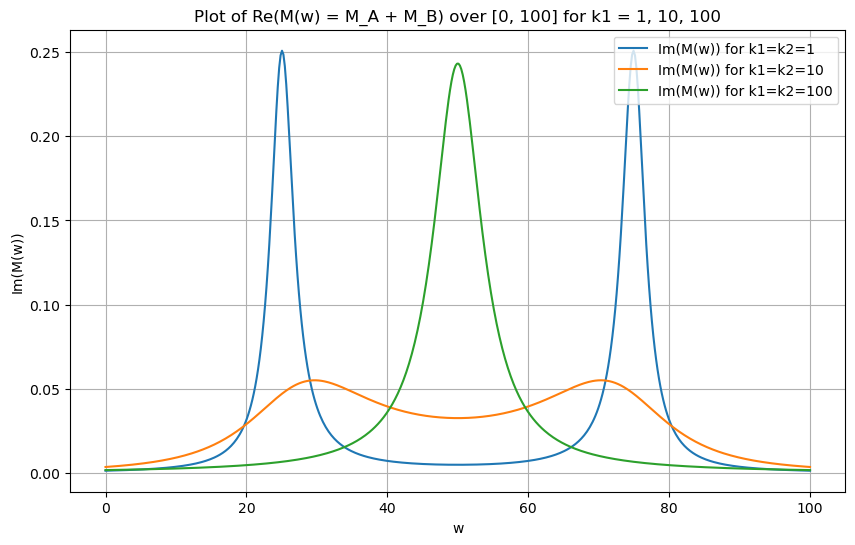

In [24]:
# Set up default values for other parameters
params = {T_A: 1, T_B: 1, w_A: 25, w_B: 75}

# Define different values of k1 to plot
k1_values = [1, 10, 100]

# Set up the plot
plt.figure(figsize=(10, 6))

# Generate values of w
w_values = np.linspace(0, 100, 500)

# Plot M(w) for each value of k1
for k1_val in k1_values:
    # Substitute k1 and other parameters into M_w
    M_w_substituted = M_w.subs({**params, k1: k1_val, k2:k1_val})
    
    # Convert to a numerical function of w
    M_w_func = sp.lambdify(w, M_w_substituted, "numpy")
    
    # Evaluate M(w) for this k1 value
    M_w_values = M_w_func(w_values)
    
    # Plot the real part of M(w) for this k1 value
    plt.plot(w_values, M_w_values.imag, label=f"Im(M(w)) for k1=k2={k1_val}")

# Customize the plot
plt.xlabel("w")
plt.ylabel("Im(M(w))")
plt.title("Plot of Re(M(w) = M_A + M_B) over [0, 100] for k1 = 1, 10, 100")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
import sympy as sp

# Define the symbolic variables k1 and k2
k1, k2 = sp.symbols('k1 k2')

# Define the matrix K
K = sp.Matrix([[-k1, k2], [k1, -k2]])

# Display the matrix
#sp.pprint(K)
K

Matrix([
[-k1,  k2],
[ k1, -k2]])

In [6]:
# Define the symbolic variables
T_A2 = sp.symbols('T_A^2')
T_B2 = sp.symbols('T_B^2')
w_A, w_B, w = sp.symbols('w_A'),sp.symbols('w_B'),sp.symbols('w')

# Define the matrix B
B = sp.Matrix([
    [-1/(T_A2) + sp.I * (w_A - w), 0],
    [0, -1/(T_B2) + sp.I * (w_B - w)]
])

# Display the matrix
#sp.pprint(T_A2)
B

Matrix([
[I*(-w + w_A) - 1/T_A^2,                      0],
[                     0, I*(-w + w_B) - 1/T_B^2]])

In [9]:
# Define symbolic variables for p_A and p_W with subscripts
p_A, p_B = sp.symbols('p_A p_B')

# Define the vector W
W = sp.Matrix([
    [sp.I * p_A],
    [sp.I * p_B]
])

W

Matrix([
[I*p_A],
[I*p_B]])

In [11]:
# Define symbolic variables for M_A and M_B
M_A, M_B = sp.symbols('M_A M_B')

# Define the matrix M
M = sp.Matrix([
    [M_A],
    [M_B]
])
M

Matrix([
[M_A],
[M_B]])

In [12]:
X=(B+K)*M+W
X

Matrix([
[M_A*(-k1 + I*(-w + w_A) - 1/T_A^2) + M_B*k2 + I*p_A],
[M_A*k1 + M_B*(-k2 + I*(-w + w_B) - 1/T_B^2) + I*p_B]])

In [13]:
# Define the equation (B + K) * M + W = 0
equation = (B + K) * M + W

# Solve the equation for M_A and M_B
solution = sp.solve(equation, [M_A, M_B])

# Display the solution
solution

{M_A: (-I*T_A^2*T_B^2*k2*p_A - I*T_A^2*T_B^2*k2*p_B + T_A^2*T_B^2*p_A*w - T_A^2*T_B^2*p_A*w_B - I*T_A^2*p_A)/(-I*T_A^2*T_B^2*k1*w + I*T_A^2*T_B^2*k1*w_B - I*T_A^2*T_B^2*k2*w + I*T_A^2*T_B^2*k2*w_A + T_A^2*T_B^2*w**2 - T_A^2*T_B^2*w*w_A - T_A^2*T_B^2*w*w_B + T_A^2*T_B^2*w_A*w_B - T_A^2*k1 - I*T_A^2*w + I*T_A^2*w_A - T_B^2*k2 - I*T_B^2*w + I*T_B^2*w_B - 1),
 M_B: (-I*T_A^2*T_B^2*k1*p_A - I*T_A^2*T_B^2*k1*p_B + T_A^2*T_B^2*p_B*w - T_A^2*T_B^2*p_B*w_A - I*T_B^2*p_B)/(-I*T_A^2*T_B^2*k1*w + I*T_A^2*T_B^2*k1*w_B - I*T_A^2*T_B^2*k2*w + I*T_A^2*T_B^2*k2*w_A + T_A^2*T_B^2*w**2 - T_A^2*T_B^2*w*w_A - T_A^2*T_B^2*w*w_B + T_A^2*T_B^2*w_A*w_B - T_A^2*k1 - I*T_A^2*w + I*T_A^2*w_A - T_B^2*k2 - I*T_B^2*w + I*T_B^2*w_B - 1)}

In [24]:
# Substitute p_A and p_B into the simplified solution
p_A_sub = k2 / (k1 + k2)
p_B_sub = k1 / (k1 + k2)

# Substitute in the solutions
substituted_solution = {var: expr.subs({sp.symbols('p_A'): p_A_sub, sp.symbols('p_B'): p_B_sub}) for var, expr in simplified_solution.items()}

#substituted_solution[M_A]
Ma =sp.simplify(substituted_solution[M_A])
Mb =sp.simplify(substituted_solution[M_B])
M = Ma+Mb
sp.simplify(M)

(T_A^2*k2*(I*T_B^2*k1 + I*T_B^2*k2 - T_B^2*w + T_B^2*w_B + I) + T_B^2*k1*(I*T_A^2*k1 + I*T_A^2*k2 - T_A^2*w + T_A^2*w_A + I))/((k1 + k2)*(I*T_A^2*T_B^2*k1*w - I*T_A^2*T_B^2*k1*w_B + I*T_A^2*T_B^2*k2*w - I*T_A^2*T_B^2*k2*w_A - T_A^2*T_B^2*w**2 + T_A^2*T_B^2*w*w_A + T_A^2*T_B^2*w*w_B - T_A^2*T_B^2*w_A*w_B + T_A^2*k1 + I*T_A^2*w - I*T_A^2*w_A + T_B^2*k2 + I*T_B^2*w - I*T_B^2*w_B + 1))